# Корьев Максим, 5030102/10101


# Теоретическая информация о модели Lasso

Lasso (Least Absolute Shrinkage and Selection Operator) – это метод линейной регрессии, который использует регуляризацию $L_1$-нормой. Он разработан для повышения устойчивости модели, предотвращения переобучения и автоматического выбора наиболее значимых признаков.

# Основные характеристики Lasso:

* **Цель минимизации:**
    Lasso стремится минимизировать следующую функцию потерь:
    $$
    \min_{\beta} \frac{1}{2n} \sum_{i=1}^n (y_i - \mathbf{x}_i^\top \beta)^2 + \alpha \sum_{j=1}^p |\beta_j|,
    $$
    где:
        $y_i$ – истинное значение целевой переменной для наблюдения $i$;
        $\mathbf{x}_i$ – вектор признаков для наблюдения $i$;
        $\beta$ – вектор коэффициентов модели;
        $\alpha$ – гиперпараметр регуляризации (всегда неотрицательный, $\alpha \geq 0$).

    Второе слагаемое, $\alpha \sum_{j=1}^p |\beta_j|$, является регуляризационным членом, который добавляет штраф за величину коэффициентов $\beta$. Это приводит к тому, что некоторые коэффициенты становятся равными нулю.

*  **Регуляризация:**
    * При $\alpha = 0$, Lasso эквивалентен обычной линейной регрессии без регуляризации.
    * Увеличение значения $\alpha$ приводит к упрощению модели за счет уменьшения количества ненулевых коэффициентов, что помогает бороться с переобучением. Модель становится более устойчивой к небольшим изменениям в обучающих данных.

* **Автоматический отбор признаков:**
    Благодаря регуляризации $L_1$, Lasso автоматически "отбирает" наиболее важные признаки, присваивая нулевые значения коэффициентам для менее значимых. Это делает модель более интерпретируемой и позволяет эффективно работать с данными высокой размерности.

* **Области применения:**
    Lasso особенно полезен в случаях, когда:
        * Необходимо выделить наиболее информативные признаки;
        * Набор данных содержит множество нерелевантных или сильно коррелированных признаков;
        * Требуется упростить модель, снизив ее сложность.

* **Гиперпараметр $\alpha$:**
        * Параметр $\alpha$ контролирует баланс между сложностью модели и ее точностью на новых данных.
        * Оптимальное значение $\alpha$ обычно находят с помощью методов перекрестной проверки, что позволяет подобрать значение, обеспечивающее наилучшую производительность модели на невидимых данных.

# Анализ и подготовка данных для модели Lasso



## Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_log_error, r2_score

## Загрузка данных

In [2]:
try:
    df = pd.read_csv("data.csv")
except FileNotFoundError:
    print("Ошибка: Файл 'data.csv' не найден. Пожалуйста, проверьте путь к файлу.")
    # Завершаем выполнение программы, если файл не найден
    exit()

Выводим первые 5 строк для ознакомления со структурой данных

In [3]:
print("Первые 5 строк данных:")
print(df.head())

Первые 5 строк данных:
   id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance

In [7]:
print("\nИнформация о данных:")
print(df.info())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Du

Выводим основные статистические характеристики числовых столбцов (среднее, медиана, стандартное отклонение и т.д.)

In [8]:
print("\nСтатистика числовых столбцов:")
print(df.describe())


Статистика числовых столбцов:
                 id           Age  Annual Income  Number of Dependents  \
count  1.200000e+06  1.181295e+06   1.155051e+06          1.090328e+06   
mean   5.999995e+05  4.114556e+01   3.274522e+04          2.009934e+00   
std    3.464103e+05  1.353995e+01   3.217951e+04          1.417338e+00   
min    0.000000e+00  1.800000e+01   1.000000e+00          0.000000e+00   
25%    2.999998e+05  3.000000e+01   8.001000e+03          1.000000e+00   
50%    5.999995e+05  4.100000e+01   2.391100e+04          2.000000e+00   
75%    8.999992e+05  5.300000e+01   4.463400e+04          3.000000e+00   
max    1.199999e+06  6.400000e+01   1.499970e+05          4.000000e+00   

       Health Score  Previous Claims   Vehicle Age  Credit Score  \
count  1.125924e+06    835971.000000  1.199994e+06  1.062118e+06   
mean   2.561391e+01         1.002689  9.569889e+00  5.929244e+02   
std    1.220346e+01         0.982840  5.776189e+00  1.499819e+02   
min    2.012237e+00         0.

 Проверяем, есть ли в данных дубликаты строк. Если есть, выводим их количество

In [9]:
print("\nКоличество дубликатов:", df.duplicated().sum())


Количество дубликатов: 0


## Визуализация данных

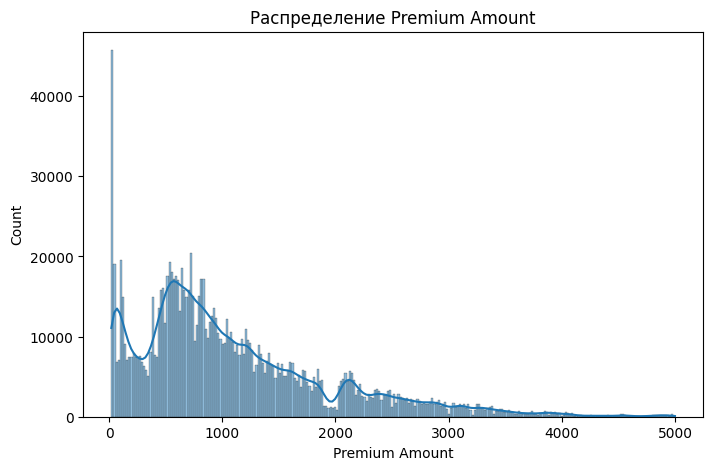

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Premium Amount'], kde=True)
plt.title('Распределение Premium Amount')
plt.show()

## Матрица корреляций
### Вычисляем и визуализируем матрицу корреляции для всех числовых столбцов

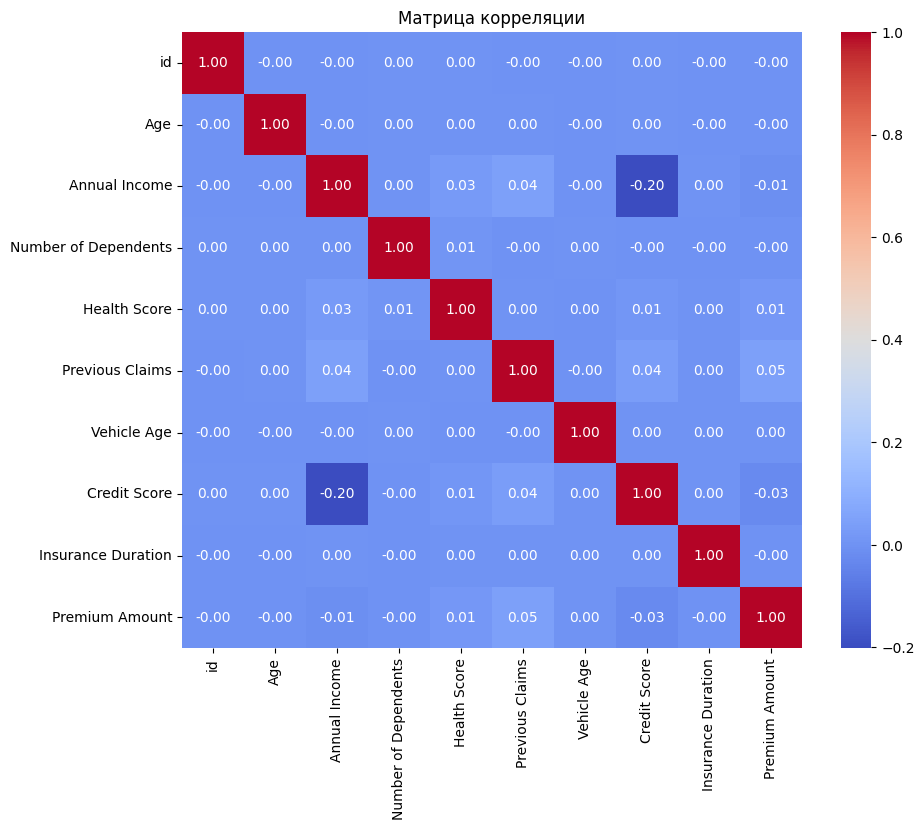

In [11]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции")
plt.show()

# Загрузка и предобработка данных

## Обработка пропущенных значений
### Заполняем пропущенные значения: медианой для числовых признаков, модой для категориальных

In [12]:
for column in df.columns:
    if df[column].isnull().any():
        if pd.api.types.is_numeric_dtype(df[column]):
            # Заполнение пропусков медианой для числовых столбцов
           df[column] = df[column].fillna(df[column].median())
        else:
            # Заполнение пропусков модой для нечисловых столбцов
            df[column] = df[column].fillna(df[column].mode()[0])

## Кодирование категориальных переменных
### Кодируем категориальные признаки с помощью Label Encoding

In [13]:
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Подготовка данных для обучения модели

### Разделение на признаки и целевую переменную

In [14]:
X = df.drop('Premium Amount', axis=1)
y = df['Premium Amount']

### Разделяем данные на обучающую и тестовую выборки в соотношении 80/20

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Обучение модели Lasso

In [16]:
alpha_value = 0.5  # параметр регуляризации, подбирается экспериментально
lasso_model = Lasso(alpha=alpha_value)
lasso_model.fit(X_train_scaled, y_train)## Оценка модели

Lasso(alpha=0.5)

## Оценка модели

In [17]:
y_pred = lasso_model.predict(X_test_scaled)
y_pred = np.maximum(0, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f'\nRMSLE на тестовой выборке: {rmsle:.4f}')
test_df = pd.DataFrame(X_test, columns=X.columns)  # Используем X_test для примера
test_df['Premium Amount'] = y_pred
try:
    test_df['id'] = df.iloc[X_test.index]['id']
except KeyError:
    test_df['id'] = range(1200000, 1200000 + len(test_df))

submission_df = test_df[['id', 'Premium Amount']]


RMSLE на тестовой выборке: 1.1687


## Визуализация результатов

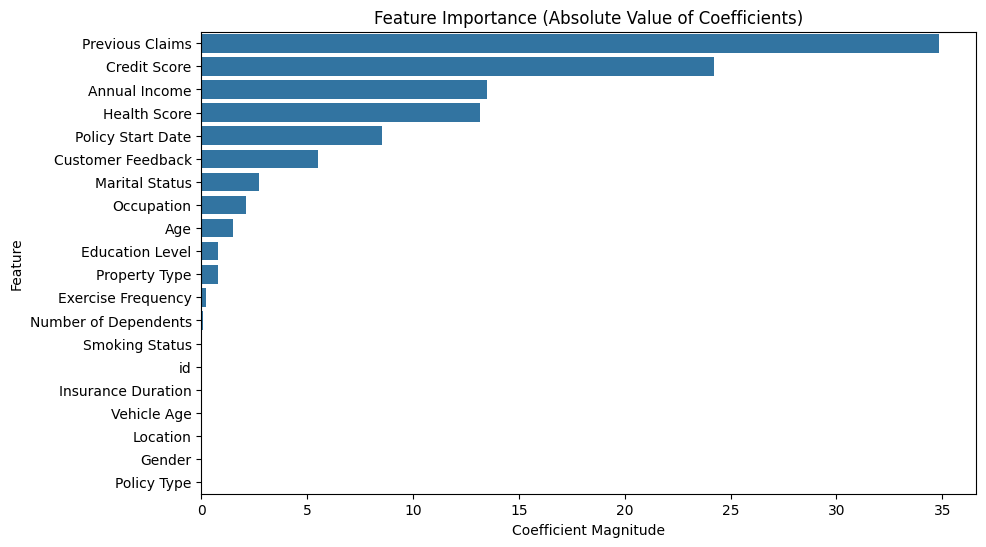

In [18]:
# ## Визуализация результатов
#
# ### Визуализация важности признаков
#  Визуализируем важность признаков, отсортированных по абсолютной величине коэффициентов
feature_importance = pd.Series(lasso_model.coef_, index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance (Absolute Value of Coefficients)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

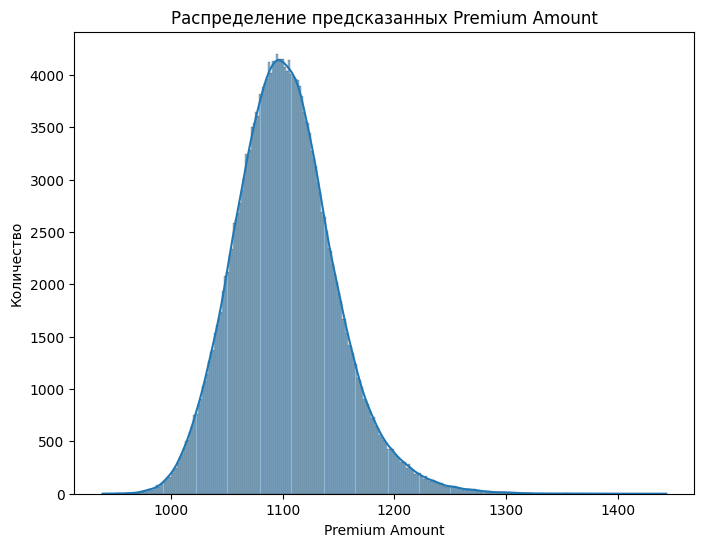

In [19]:

# ###  Визуализация распределения предсказанных значений Premium Amount
plt.figure(figsize=(8, 6))
sns.histplot(submission_df['Premium Amount'], kde=True)
plt.title('Распределение предсказанных Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Количество')
plt.show()


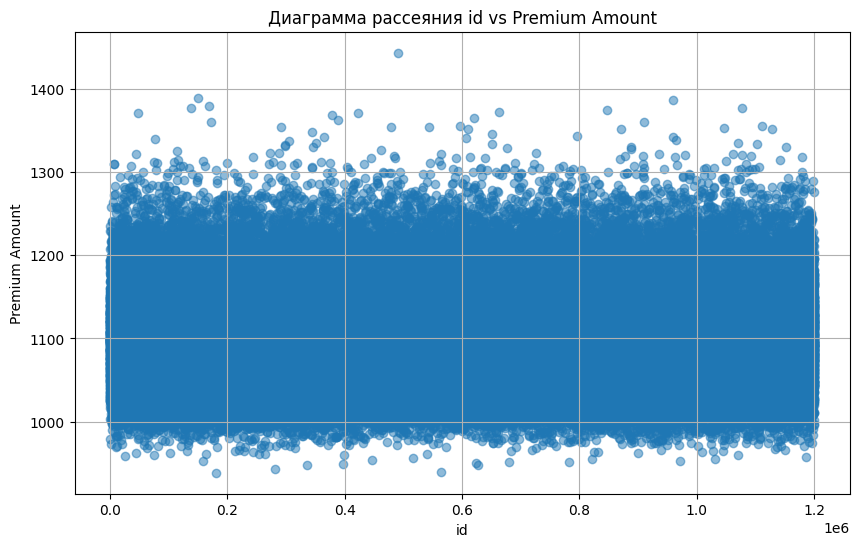

In [20]:
# ### Диаграмма рассеяния (Scatter plot) id vs Premium Amount
plt.figure(figsize=(10, 6))
plt.scatter(submission_df['id'], submission_df['Premium Amount'], alpha=0.5)
plt.title('Диаграмма рассеяния id vs Premium Amount')
plt.xlabel('id')
plt.ylabel('Premium Amount')
plt.grid(True)
plt.show()


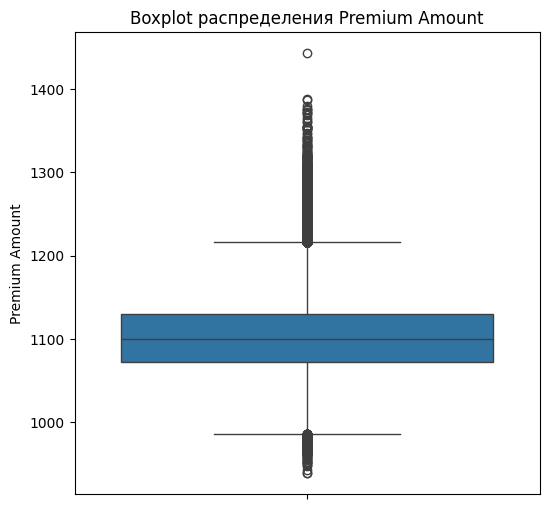

In [21]:
# ###  Boxplot распределения Premium Amount
plt.figure(figsize=(6, 6))
sns.boxplot(y=submission_df['Premium Amount'])
plt.title('Boxplot распределения Premium Amount')
plt.ylabel('Premium Amount')
plt.show()

MAE: 667.3036
RMSE: 863.2837
R2: 0.0027


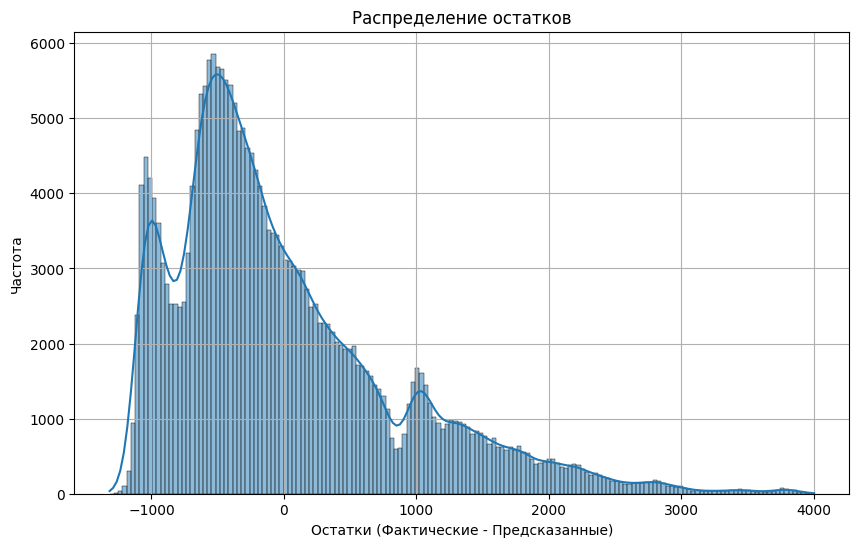

In [22]:
# Дополнительные метрики
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2: {r2:.4f}')
# График остатков
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Остатки (Фактические - Предсказанные)')
plt.ylabel('Частота')
plt.title('Распределение остатков')
plt.grid(True)
plt.show()
